<a href="https://colab.research.google.com/github/AthaSSiN/ACA_PML/blob/master/GMM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from keras.datasets import mnist
(trainX, trainY) , (testX , testY) = mnist.load_data()

#normalizing train and test data
trainX = trainX/255
testX = testX/255

# converting data into tuple form of image and value (though not required)
train = [[trainX[i].reshape(784), trainY[i]] for i in range(len(trainX))]
test = [[testX[i].reshape(784), testY[i]] for i in range(len(testX))]

print(len(train))
print(len(train[0])) 



60000
2


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [116]:
batchSize = 60000 #Batch EM
K = 10 #number of classes > 10 to increase accuracy of classifcationn
n = len(train)

pi = 0.1*np.ones(K)
print(pi)

mu = np.random.randn(K,784)/2 + 0.5 #centering mu about 0.5

sig = [np.identity(784) for i in range(K)]

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [0]:
def calc(miniBatch, pi, mu, sig):
 
 #-----------------E step----------------------
  Ez = np.zeros((batchSize, K)) # expectancy values of z[i,j]
  temp = np.zeros((batchSize, 784)) # for storing values of input images

  for index, x in enumerate(miniBatch):
    temp[index] = x[0]
    
    # omitting sigma terms in exponent as  it was initialized with identity and there's only 1 epoch
    vals = [pi[k]*np.exp(-0.5*np.dot(temp[index]-mu[:][k], temp[index]-mu[:][k])) for k in range(K)]
    valSum = np.sum(vals)
    Ez[index] = [vals[p]/valSum for p in range(K)]

  #-----------------M step ------------------------ 
  print(Ez)

  Nk = np.sum(Ez, axis = 0) 
  pi = Nk/batchSize
  
  for k in range (K):
    mu[k] = np.sum((temp.T * Ez[:, k]).T, axis = 0) / Nk[k]
    sig[k] = np.sum([((np.matmul(temp[i] - mu[k], temp[i]-mu[k]) * Ez[i, k])) / Nk[k] for i in range(batchSize)], axis = 0)

In [122]:
#train the batch
calc(train, pi, mu, sig)


[[4.21651619e-14 4.71620894e-01 1.30290476e-03 ... 8.04335065e-04
  2.54336835e-02 6.46742198e-05]
 [2.23937402e-17 4.48308556e-10 1.22243251e-06 ... 9.81194070e-01
  2.08432558e-08 1.38124504e-10]
 [4.81660092e-05 1.35382170e-02 3.98150274e-03 ... 1.19939303e-08
  5.77476506e-01 4.04857513e-01]
 ...
 [1.87727293e-16 2.07654355e-01 8.08423892e-05 ... 1.67684563e-07
  6.77443848e-01 1.34757738e-06]
 [3.79505648e-13 1.13931670e-03 9.97778941e-01 ... 5.41550773e-05
  2.83715433e-04 7.39314049e-04]
 [1.25283792e-11 1.61630987e-01 6.14276628e-01 ... 6.40530542e-07
  9.48921900e-03 2.12855527e-03]]


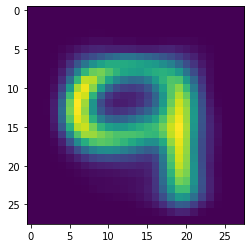

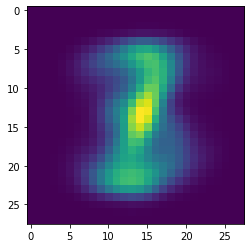

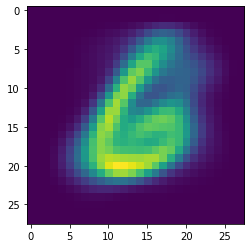

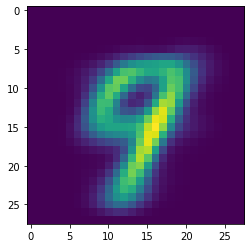

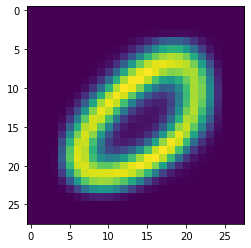

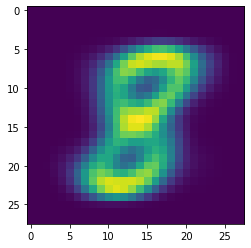

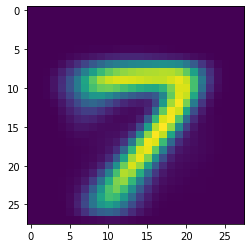

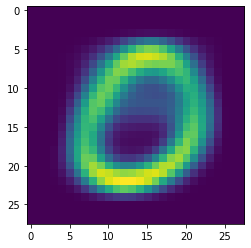

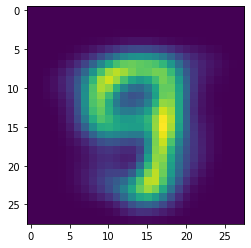

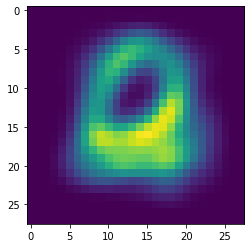

In [123]:
for i in range(K):
  plt.imshow(mu[i].reshape(28,28))
  plt.show()